In [156]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets

In [157]:
use_cuda = torch.cuda.is_available()

In [158]:
device = torch.device('cuda') if use_cuda else "cpu"

In [159]:
# separable = False
# while not separable:
#     samples = datasets.make_classification(n_samples=25000, n_features=2, 
#                                     n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
#     red = samples[0][samples[1] == 0]
#     blue = samples[0][samples[1] == 1]
#     separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
# plt.plot(red[:, 0], red[:, 1], 'r.')
# plt.plot(blue[:, 0], blue[:, 1], 'b.')
# plt.show()

In [160]:
# X_moons_train = torch.tensor(samples[0][0:20000], dtype = torch.float32)
# X_moons_valid = torch.tensor(samples[0][20000:], dtype = torch.float32)
# Y_moons_train = torch.tensor(samples[1][0:20000], dtype = torch.float32)
# Y_moons_valid = torch.tensor(samples[1][20000:], dtype = torch.float32)
# Y_moons_train = Y_moons_train.view(Y_moons_train.size()[0], 1)
# Y_moons_valid = Y_moons_valid.view(Y_moons_valid.size()[0], 1)

In [226]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(50, 32)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(32, 8)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(8, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.relu2(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y

In [227]:
def train_epoch(model, opt, batch_size, criterion,X_data, Y_data):
    model.train()
    losses = []
    running_corrects = 0
    shuffled_idx = list(np.random.permutation(X_data.size()[0]))
    X_data_shuffled = [X_data[i] for i in shuffled_idx]
    Y_data_shuffled = [Y_data[i] for i in shuffled_idx]
    minibatch_idxs = np.array_split(shuffled_idx, len(shuffled_idx)/batch_size)
    for minibatch_ids in minibatch_idxs:
        x_batch = X_data[minibatch_ids]
        y_batch = Y_data[minibatch_ids]
        #print("batch size: ",len(x_batch), "actual size: ", len(minibatch_ids))
        x_batch = Variable(x_batch).to(device)
        y_batch = Variable(y_batch).to(device)
        opt.zero_grad()
        y_hat = net(x_batch)
        y_preds = (y_hat > 0.5).type(torch.float32)
        cumulative_corrects = float(torch.sum(y_preds == y_batch).item())
        running_corrects += cumulative_corrects
        #print("RC, SC, TS", running_corrects, cumulative_corrects, y_preds.size()[0])
        #print(running_corrects)
        loss = criterion(y_hat, y_batch)
        loss.backward()
        opt.step()        
        losses.append(loss.item())
    accuracy = running_corrects * 1.0 / len(shuffled_idx)
    print("training accuracy..", accuracy)
    return losses

In [228]:
def validation(model, batch_size, X_data, Y_data):
    model.eval()
    running_corrects = 0
    shuffled_idx = list(np.random.permutation(X_data.size()[0]))
    X_data_shuffled = [X_data[i] for i in shuffled_idx]
    Y_data_shuffled = [Y_data[i] for i in shuffled_idx]
    minibatch_idxs = np.array_split(shuffled_idx, len(shuffled_idx)/batch_size)
    for minibatch_ids in minibatch_idxs:
        x_batch = X_data[minibatch_ids]
        y_batch = Y_data[minibatch_ids]
        x_batch = Variable(x_batch).to(device)
        y_batch = Variable(y_batch).to(device)
        with torch.no_grad():
            outputs = model(x_batch)
        y_preds = (outputs > 0.5).type(torch.float32)
        cumulative_corrects = float(torch.sum(y_preds == y_batch).item())
        #print(cumulative_corrects, y_preds.size()[0])
        running_corrects += cumulative_corrects
    accuracy = running_corrects * 1.0 / len(shuffled_idx)
    print("validation accuracy..", accuracy)
    return

### CIrcular data

In [229]:
X, Y = datasets.make_circles(n_samples=25000, factor=.6, noise=.1)

In [230]:
X_train = torch.tensor(X[0:20000], dtype = torch.float32)
X_valid = torch.tensor(X[20000:], dtype = torch.float32)
Y_train = torch.tensor(Y[0:20000], dtype = torch.float32)
Y_valid = torch.tensor(Y[20000:], dtype = torch.float32)

Y_train = Y_train.view(Y_train.size()[0], 1)
Y_valid = Y_valid.view(Y_valid.size()[0], 1)
one_indices = np.where(Y==1)
zero_indices = np.where(Y==0)

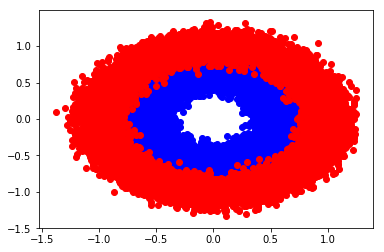

In [231]:
plt.scatter(X[one_indices, 0], X[one_indices, 1], color='b')
plt.scatter(X[zero_indices, 0], X[zero_indices, 1], color='r')

### random linear data

In [237]:
# X1 = torch.randn(6000, 50)
# X2 = torch.randn(6000, 50) + 1.5
# X = torch.cat([X1, X2], dim=0)
# Y1 = torch.zeros(6000, 1)
# Y2 = torch.ones(6000, 1)
# Y = torch.cat([Y1, Y2], dim=0)

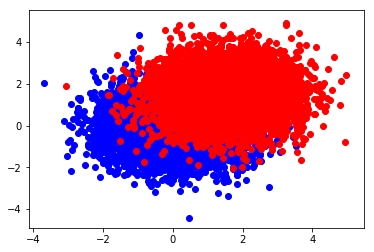

In [238]:
/

In [239]:
X_train = torch.tensor(X[0:5000], dtype = torch.float32)
X_valid = torch.tensor(X[5000:], dtype = torch.float32)
Y_train = torch.tensor(Y[0:5000], dtype = torch.float32)
Y_valid = torch.tensor(Y[5000:], dtype = torch.float32)

/home/forcerequestspring19_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/home/forcerequestspring19_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/home/forcerequestspring19_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avo

In [240]:
net = Net().to(device)
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
batch_size = 32
criterion = nn.BCELoss()

training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training accuracy.. 1.0
validation accuracy.. 0.14285714285714285
training a

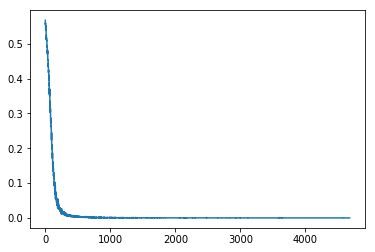

In [241]:
e_losses = []
num_epochs = 30
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, batch_size, criterion, X_train, Y_train)
    validation(net,batch_size, X_valid, Y_valid)
plt.plot(e_losses)